In [1]:
import numpy as np
import pandas as pd
import os, sys, time
from scipy import stats
from matplotlib import pyplot as plt

#import generate_dose_response_old_for_more_qc_0_1 as gdr
import generate_dose_response_newest_no_avg as gdr

import BMD_BMDL_estimation as bmdest
import Plot_Save as ps
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/Dropbox/script/python/srpAnalytics/analysis/paritosh_original_then_edit/qc_BMD/7_PAH_zf_morphology


In [3]:
complete_file_path = '/Users/kimd999/Dropbox/script/python/srpAnalytics/analysis/paritosh_original_then_edit/to_dockerize/input/7_PAH_zf_morphology_data_2020NOV11_tall_wide_DNC_0.csv'

morphological_data = pd.read_csv(complete_file_path, header = 0)
pd.set_option('display.max_columns', None)
display(morphological_data.head())
display(morphological_data.columns)
display(np.unique(morphological_data.well))

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRN_,CRAN,DNC_,DP24,EDEM,LTRK,MO24,MORT,MUSC,NC__,SKIN,SM24,TCHR
0,3756,20544,A01,3756_20544_A01,100.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,3756,20544,A02,3756_20544_A02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3756,20544,A03,3756_20544_A03,100.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3756,20544,A04,3756_20544_A04,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3756,20544,A05,3756_20544_A05,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Index(['chemical.id', 'plate.id', 'well', 'chemical_plate_well', 'conc',
       'AXIS', 'BRN_', 'CRAN', 'DNC_', 'DP24', 'EDEM', 'LTRK', 'MO24', 'MORT',
       'MUSC', 'NC__', 'SKIN', 'SM24', 'TCHR'],
      dtype='object')

array(['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09',
       'A10', 'A11', 'A12', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06',
       'B07', 'B08', 'B09', 'B10', 'B11', 'B12', 'C01', 'C02', 'C03',
       'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12',
       'D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09',
       'D10', 'D11', 'D12', 'E01', 'E02', 'E03', 'E04', 'E05', 'E06',
       'E07', 'E08', 'E09', 'E10', 'E11', 'E12', 'F01', 'F02', 'F03',
       'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12',
       'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09',
       'G10', 'G11', 'G12', 'H01', 'H02', 'H03', 'H04', 'H05', 'H06',
       'H07', 'H08', 'H09', 'H10', 'H11', 'H12'], dtype=object)

In [4]:
#np.sum(morphological_data['MO24'] == 1)

In [5]:
test_data_sim = 0
if(test_data_sim == 0):
    # Add aggregate endpoints
    # 1. Any effect at 24hrs (combination of MO24, DP24 and SM24) >> 'ANY24'
    morphological_data['ANY24'] = morphological_data[['MO24','DP24','SM24']].sum(axis=1,skipna=True,min_count=1)
    
    # 2. Any effect within 5 days (combination of all measurements at both time points)
    morphological_data['ANY120'] = morphological_data[['AXIS', 'BRN_', 'CRAN', 'EDEM', 'LTRK', 'MORT', 'MUSC', 'NC__', 'SKIN', 'TCHR', 'ANY24']].sum(axis=1,skipna=True,min_count=1)
    
    # 3. Total mortality (MO24 + MORT) >> 'TOT_MORT'
    morphological_data['TOT_MORT'] = morphological_data[['MO24','MORT']].sum(axis=1,skipna=True,min_count=1)

    # 4. Any effect except mortality (#2 minus MO24 and MORT) >> 'ALL_BUT_MORT'
    morphological_data['ALL_BUT_MORT'] = morphological_data[['AXIS', 'BRN_', 'CRAN', 'DP24', 'EDEM', \
                                                             'LTRK', 'MUSC', 'NC__', 'SKIN', 'SM24', 'TCHR']].sum(axis=1,skipna=True,min_count=1)


In [6]:
# morphological_data_end_point_chemical_id = morphological_data.loc[morphological_data['chemical.id'] == chemical_id,['chemical.id', 'conc', 'plate.id', 'well', end_point]]
morphological_data_end_point_chemical_id = morphological_data.loc[morphological_data['chemical.id'] == 1532,['chemical.id', 'conc', 'plate.id', 'well', 'ANY24']]
display(morphological_data_end_point_chemical_id)
#display(morphological_data.loc[morphological_data[]'chemical.id']==1532)
#print ("done")

,chemical.id,conc,plate.id,well,ANY24


In [7]:
display(morphological_data.head())

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRN_,CRAN,DNC_,DP24,EDEM,LTRK,MO24,MORT,MUSC,NC__,SKIN,SM24,TCHR,ANY24,ANY120,TOT_MORT,ALL_BUT_MORT
0,3756,20544,A01,3756_20544_A01,100.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN
1,3756,20544,A02,3756_20544_A02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3756,20544,A03,3756_20544_A03,100.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN
3,3756,20544,A04,3756_20544_A04,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3756,20544,A05,3756_20544_A05,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
if (os.path.isdir("output") == False):
    os.mkdir("output")

output_folder = os.path.join(starting_dir, "output")
os.chdir(output_folder)
    
if (os.path.isdir("report") == False):
    os.mkdir("report")
    
morphological_data_filename = os.path.join("report", 'morphological_data.csv')
morphological_data_file_out = open(morphological_data_filename, "w")
morphological_data.to_csv(morphological_data_filename, index=False)
morphological_data_file_out.close()

In [9]:
start_time = time.time()
# Specify end_point and chemical of interest
# *********************************************
# Perform a check of the existence of "essential" column labels
# *********************************************
#end_point = 'NC24'
#chemical_id = 3005#3005#2142#1211#1595#2770#220

#test_dose_filename = os.path.join("report", 'test_dose.csv')
#test_dose_f_out = open(test_dose_filename, "w")

overall_report_filename = os.path.join("report", 'overall_report.csv')
overall_report_file = open(overall_report_filename, "w")
write_this = "chemical_id,end_point,len_test_dose_response\n"
overall_report_file.write(write_this)

qc_flag_filename = os.path.join("report", 'qc_flag.csv')
qc_flag_file_out = open(qc_flag_filename, "w")

write_this = "qc_flag\n"
qc_flag_file_out.write(write_this)

erased_morphological_data_end_point_chemical_id_filename = os.path.join("report", 'erased_morphological_data_end_point_chemical_id.txt')

erased_morphological_data_end_point_chemical_id_file = open(erased_morphological_data_end_point_chemical_id_filename, "w")
write_this="chemical_id,plate_id,end_point\n"
erased_morphological_data_end_point_chemical_id_file.write(write_this)
erased_morphological_data_end_point_chemical_id_file.close()


# full -> 17
#end_points = ['ANY24','ANY120','AXIS','ALL_BUT_MORT','BRN_','CRAN','DP24','EDEM','LTRK', 'MO24','MORT','MUSC','NC__','SKIN','SM24','TCHR','TOT_MORT']

end_points = ['ANY24']

# 336 chemicals
#for chemical_id in np.unique(morphological_data['chemical.id']):
    
for chemical_id in [3758]:
#for chemical_id in [53]:
    print("chemical_id:" + str(chemical_id))
#    if (chemical_id < 332):
#        continue

    for end_point in end_points:
#        print(end_point)
        #os.chdir(starting_dir)
        os.chdir(output_folder)
        # subset original dataframe for a user-specified chemical and end_point pair
        morphological_data_end_point_chemical_id = morphological_data.loc[morphological_data['chemical.id'] == chemical_id,['chemical.id', 'conc', 'plate.id', 'well', end_point]]
        
        # Binarize end-point hits (Values > 1 are forced to 1)
        end_point_hits = morphological_data_end_point_chemical_id[end_point]
        end_point_hits.loc[end_point_hits > 0] = 1
        
        #print (str(morphological_data_end_point_chemical_id))
   #     morphological_data_end_point_chemical_id.to_csv('morpho.csv', index=False)

#        f_end_point = open('end_point.txt', 'w')
 #       f_end_point.write(str(end_point))
  #      f_end_point.close()
                  
        dose_response = gdr.gen_dose_response(morphological_data_end_point_chemical_id, end_point, \
                                              erased_morphological_data_end_point_chemical_id_filename)
        #print ("dose_response:" + str(dose_response))
        #'''
        
        qc_flag = gdr.BMD_feasibility_analysis(dose_response)
    #    qc_flag = gdr.BMD_feasibility_analysis_qc_1(dose_response)
        qc_flag_file_out.write(str(qc_flag)+"\n")
        
        test_dose_response = gdr.reformat_dose_response(dose_response)
        
#        write_this = str(chemical_id) + "," + str(end_point) + "," + str(len(test_dose_response)) + "\n"
 #       print ("write_this:"+str(write_this))
  #      f_out.write(write_this)
    
        qc_flag_folder = "qc_" + str(qc_flag)
        if (os.path.isdir(str(qc_flag_folder)) == False):
            os.mkdir(str(qc_flag_folder))
        os.chdir(str(qc_flag_folder))

        
        if(qc_flag in [0, 1]):
            # No BMD analysis required. Generate report and exit
            ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, None)
        else:
            # Fit dose response models
            model_predictions = bmdest.analyze_dose_response_data(test_dose_response)
            # Select best model
            selected_model_params = bmdest.select_model(model_predictions)
            # Check if unique model is found
            unique_model_flag = selected_model_params['no_unique_model_found_flag']
            if(unique_model_flag == 0):
                # Generate report
                print(test_dose_response.dose[-1:])
                ps.save_results_good_data_unique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
            else:
                bmd_analysis_flag = selected_model_params['model_select_flag']
                if(bmd_analysis_flag == 1):
                    ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, selected_model_params)
                else:
                    ps.save_results_good_data_nounique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
#        '''
#test_dose_f_out.close()
#f_out.close()
qc_flag_file_out.close()
end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took)) 
# for all combinations (e.g. 7 chemicals x 17 endpoints, it took 100~180 seconds)
# for all combinations of 336 chemicals and 18 endpoints, 4 minutes took for qc only
# for all combinations of 336 chemicals and 18 endpoints, 104~165 minutes took for qc and bmd report

chemical_id:3758
data_ep_cid:
     chemical.id  conc  plate.id well  ANY24
287         3758  59.6     21407  A01    0.0
288         3758  59.6     21407  A02    1.0
289         3758  59.6     21407  A03    1.0
290         3758  59.6     21407  A04    1.0
291         3758  59.6     21407  A05    1.0
..           ...   ...       ...  ...    ...
570         3758   0.0     21418  H08    0.0
571         3758   0.0     21418  H09    0.0
572         3758   0.0     21418  H10    0.0
573         3758   0.0     21418  H11    0.0
574         3758   0.0     21418  H12    0.0

[288 rows x 5 columns]
data_ep_cid:
     chemical.id  conc  plate.id well  ANY24
287         3758  59.6     21407  A01    0.0
288         3758  59.6     21407  A02    1.0
289         3758  59.6     21407  A03    1.0
290         3758  59.6     21407  A04    1.0
291         3758  59.6     21407  A05    1.0
..           ...   ...       ...  ...    ...
570         3758   0.0     21418  H08    0.0
571         3758   0.0     21418 

In [10]:
#print (morphological_data_end_point_chemical_id)
np.asarray(morphological_data_end_point_chemical_id['plate.id'])

array([21407, 21407, 21407, 21407, 21407, 21407, 21407, 21407, 21407,
       21407, 21407, 21407, 21407, 21407, 21407, 21407, 21407, 21407,
       21407, 21407, 21407, 21407, 21407, 21407, 21407, 21407, 21407,
       21407, 21407, 21407, 21407, 21407, 21407, 21407, 21407, 21407,
       21407, 21407, 21407, 21407, 21407, 21407, 21407, 21407, 21407,
       21407, 21407, 21407, 21407, 21407, 21407, 21407, 21407, 21407,
       21407, 21407, 21407, 21407, 21407, 21407, 21407, 21407, 21407,
       21407, 21407, 21407, 21407, 21407, 21407, 21407, 21407, 21407,
       21407, 21407, 21407, 21407, 21407, 21407, 21407, 21407, 21407,
       21407, 21407, 21407, 21407, 21407, 21407, 21407, 21407, 21407,
       21407, 21407, 21407, 21407, 21407, 21407, 21408, 21408, 21408,
       21408, 21408, 21408, 21408, 21408, 21408, 21408, 21408, 21408,
       21408, 21408, 21408, 21408, 21408, 21408, 21408, 21408, 21408,
       21408, 21408, 21408, 21408, 21408, 21408, 21408, 21408, 21408,
       21408, 21408,

In [11]:
#[np.unique(morphological_data_end_point_chemical_id['chemical.id'].values()),1]

qc_flag_filename:report/qc_flag.csv


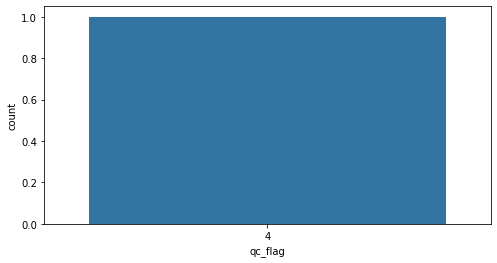

In [12]:
os.chdir(output_folder)

qc_flag_filename = os.path.join("report", 'qc_flag.csv')
print ("qc_flag_filename:"+str(qc_flag_filename))
qc_flag_data = pd.read_csv(qc_flag_filename, index_col=None)
#display(qc_flag_data.head())
ds = pd.Series({"Column": qc_flag_data["qc_flag"]})
plt.figure(figsize=(8,4))
sns.countplot(x="Column", data=ds)
plt.show()

In [13]:
'''os.chdir(starting_dir)

sns.set_theme(style="whitegrid")
print ("array_filename:"+str(array_filename))
array_report_data = pd.read_csv(array_filename, index_col=None)
display(array_report_data.head())
#ax = sns.barplot(x="end_point", y="len_test_dose_response", data=array_report_data)

ds = pd.Series({"Column": array_report_data["len_test_dose_response"]})
plt.figure(figsize=(8,4))
plt.xlabel("leng")
sns.countplot(x="Column", data=ds)
plt.show()
print ("done")'''

'os.chdir(starting_dir)\n\nsns.set_theme(style="whitegrid")\nprint ("array_filename:"+str(array_filename))\narray_report_data = pd.read_csv(array_filename, index_col=None)\ndisplay(array_report_data.head())\n#ax = sns.barplot(x="end_point", y="len_test_dose_response", data=array_report_data)\n\nds = pd.Series({"Column": array_report_data["len_test_dose_response"]})\nplt.figure(figsize=(8,4))\nplt.xlabel("leng")\nsns.countplot(x="Column", data=ds)\nplt.show()\nprint ("done")'

In [14]:
test_dose_response.dose

0     0.0
1     2.5
2     4.5
3     8.0
4    14.2
5    25.2
6    44.8
7    59.6
Name: dose, dtype: float64

In [15]:
#test_dose_response.dose.iloc[0]+test_dose_response.dose.iloc[1]

In [16]:
dose_response['num_affect']/dose_response['num_embryos']

0    0.027778
1    0.138889
2    0.083333
3    0.000000
4    0.111111
5    0.111111
6    0.138889
7    0.194444
dtype: float64